In [1]:
from PoE_GPFlow import PoE_GPFlow
m = PoE_GPFlow()

2025-04-23 15:42:44.412339: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 15:42:44.413733: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 15:42:44.417736: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 15:42:44.426902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745422964.442065   42350 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745422964.44

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = np.sin(X) + 0.05 * np.random.randn(100, 1)  # Noisy sine wave

m.train(X, Y, no_experts=3, allow_seperate_hyperparms=True)
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
mean, var, beta = m.predict(X_new)


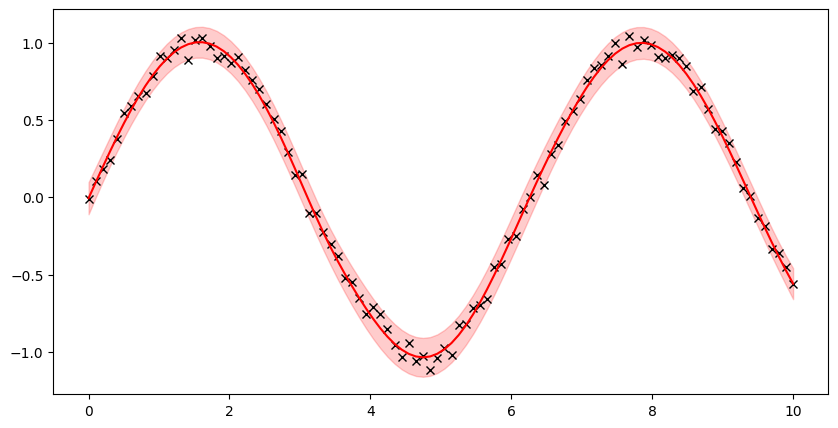

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(X, Y, 'kx', label='Data')
ax.plot(X_new, mean, 'r', label='Mean prediction')
ax.fill_between(X_new.flatten(), 
                mean.flatten() - 1.96 * np.sqrt(var.flatten()), 
                mean.flatten() + 1.96 * np.sqrt(var.flatten()), 
                color='red', alpha=0.2, label='95% confidence interval')